In [1]:
import os
import pandas as pd
import datetime
from dateutil import relativedelta
import calendar
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# 1. Reading scraped data

In [2]:
df = pd.read_csv(r"D:\flipkart reviews\all csv combine\raw_reviews.csv")

In [3]:
df.head()

,prod_id,product_name,brand_name,category,price,sold,prod_url,customer_name,purchase_date,customers_city,rating,comment_head,comment
0,lapto6288,acer Aspire 3 Core i5 11th Gen - (8 GB/512 GB ...,acer,laptop,44999.0,1.0,https://www.flipkart.com/acer-aspire-3-core-i5...,Flipkart Customer,4 days ago,Karimpur,5.0,Great product,Very good product 🙂🎈🎈🎈🎈🎈
1,lapto6288,acer Aspire 3 Core i5 11th Gen - (8 GB/512 GB ...,acer,laptop,44999.0,1.0,https://www.flipkart.com/acer-aspire-3-core-i5...,Flipkart Customer,4 days ago,Ranchi,4.0,Really Nice,nice
2,lapto6288,acer Aspire 3 Core i5 11th Gen - (8 GB/512 GB ...,acer,laptop,44999.0,1.0,https://www.flipkart.com/acer-aspire-3-core-i5...,Dhiraj Jaiswal,5 days ago,Sidhi,3.0,Does the job,Good
3,lapto6288,acer Aspire 3 Core i5 11th Gen - (8 GB/512 GB ...,acer,laptop,44999.0,1.0,https://www.flipkart.com/acer-aspire-3-core-i5...,Vasamsetti Durgayya,11 days ago,Hyderabad,5.0,Best in the market!,Good product at this price.i am very happy.per...
4,lapto6288,acer Aspire 3 Core i5 11th Gen - (8 GB/512 GB ...,acer,laptop,44999.0,1.0,https://www.flipkart.com/acer-aspire-3-core-i5...,Flipkart Customer,14 days ago,Bengaluru,1.0,Did not meet expectations,Worst laptop don't buy this laptop


In [4]:
df.tail()

,prod_id,product_name,brand_name,category,price,sold,prod_url,customer_name,purchase_date,customers_city,rating,comment_head,comment
939338,telev8034,Xiaomi OLED Vision 138.8 cm (55 inches) 4K Ult...,Xiaomi,television,99999.0,1.0,https://www.flipkart.com/xiaomi-oled-vision-13...,P R Gurubramha,3 months ago,Pileru,5.0,Simply awesome,"Very Nice TV, I recommend you all this TV. Sim..."
939339,telev8034,Xiaomi OLED Vision 138.8 cm (55 inches) 4K Ult...,Xiaomi,television,99999.0,1.0,https://www.flipkart.com/xiaomi-oled-vision-13...,Dewin Albert,3 months ago,Hosur,5.0,Classy product,"Worth a penny, excellent tv, punchy colours. P..."
939340,telev8034,Xiaomi OLED Vision 138.8 cm (55 inches) 4K Ult...,Xiaomi,television,99999.0,1.0,https://www.flipkart.com/xiaomi-oled-vision-13...,Sunil V,6 months ago,Ernakulam,5.0,Awesome,Very satisfied with the product so far. It's ...
939341,telev8034,Xiaomi OLED Vision 138.8 cm (55 inches) 4K Ult...,Xiaomi,television,99999.0,1.0,https://www.flipkart.com/xiaomi-oled-vision-13...,hitesh ohri,7 months ago,Hoshiarpur,4.0,Good quality product,Good product
939342,telev8034,Xiaomi OLED Vision 138.8 cm (55 inches) 4K Ult...,Xiaomi,television,99999.0,1.0,https://www.flipkart.com/xiaomi-oled-vision-13...,Fayeem Shaikh,7 months ago,Pune,5.0,Great product,Good OLED in less price very slim and Super pi...


In [5]:
df['category'].unique()

array(['laptop', 'television', 'water purifier', 'smartphone',
       'air conditioner', nan, 'refrigerator', 'washing machine'],
      dtype=object)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 939343 entries, 0 to 939342
Data columns (total 13 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   prod_id         918343 non-null  object 
 1   product_name    918343 non-null  object 
 2   brand_name      918343 non-null  object 
 3   category        937432 non-null  object 
 4   price           918343 non-null  float64
 5   sold            937432 non-null  float64
 6   prod_url        937432 non-null  object 
 7   customer_name   936666 non-null  object 
 8   purchase_date   937432 non-null  object 
 9   customers_city  937432 non-null  object 
 10  rating          937432 non-null  float64
 11  comment_head    937432 non-null  object 
 12  comment         937179 non-null  object 
dtypes: float64(3), object(10)
memory usage: 93.2+ MB


In [7]:
len(df)

939343

# 2. Find % of missing values in data

In [8]:
df.isna().sum()

prod_id           21000
product_name      21000
brand_name        21000
category           1911
price             21000
sold               1911
prod_url           1911
customer_name      2677
purchase_date      1911
customers_city     1911
rating             1911
comment_head       1911
comment            2164
dtype: int64

In [9]:
na_features = [feature for feature in df.columns if df[feature].isnull().sum()>0]
print(na_features)

['prod_id', 'product_name', 'brand_name', 'category', 'price', 'sold', 'prod_url', 'customer_name', 'purchase_date', 'customers_city', 'rating', 'comment_head', 'comment']


In [10]:
for feature in na_features:
    print(f"{feature} has {(df[feature].isnull().sum()/len(df)*100).round(4)}% missing values")

prod_id has 2.2356% missing values
product_name has 2.2356% missing values
brand_name has 2.2356% missing values
category has 0.2034% missing values
price has 2.2356% missing values
sold has 0.2034% missing values
prod_url has 0.2034% missing values
customer_name has 0.285% missing values
purchase_date has 0.2034% missing values
customers_city has 0.2034% missing values
rating has 0.2034% missing values
comment_head has 0.2034% missing values
comment has 0.2304% missing values


### 2.1. removing missing values from "customer_name" and "product_name"feature

In [11]:
df.dropna(axis= 'index', subset=['customer_name'], inplace=True)

In [12]:
df.dropna(axis= 'index', subset=['product_name'], inplace=True)

In [13]:
df.isna().sum()

prod_id             0
product_name        0
brand_name          0
category            0
price               0
sold                0
prod_url            0
customer_name       0
purchase_date       0
customers_city      0
rating              0
comment_head        0
comment           252
dtype: int64

In [14]:
len(df)

917577

# 3. Duplicated rows

In [15]:
duplicate_rows = df[df.duplicated()]
duplicate_rows.head()

,prod_id,product_name,brand_name,category,price,sold,prod_url,customer_name,purchase_date,customers_city,rating,comment_head,comment
2769,telev6269,acer Frameless 80 cm (32 inch) HD Ready LED Sm...,acer,television,13999.0,1.0,https://www.flipkart.com/acer-frameless-80-cm-...,Jitendra Agrawal,3 months ago,Tendukheda Narsimhapur District,1.0,Useless product,Waste product. TV screen gets black automatica...
2771,telev6269,acer Frameless 80 cm (32 inch) HD Ready LED Sm...,acer,television,13999.0,1.0,https://www.flipkart.com/acer-frameless-80-cm-...,Chiranjeev Sugandh,4 months ago,Certified Buyer,1.0,Worthless,Cheaters
2819,telev6269,acer Frameless 80 cm (32 inch) HD Ready LED Sm...,acer,television,13999.0,1.0,https://www.flipkart.com/acer-frameless-80-cm-...,SATYA BEHERA,7 months ago,Bhawanipatna,5.0,Highly recommended,Exelent
2827,telev6269,acer Frameless 80 cm (32 inch) HD Ready LED Sm...,acer,television,13999.0,1.0,https://www.flipkart.com/acer-frameless-80-cm-...,Flipkart Customer,7 months ago,Coimbatore,5.0,Mind-blowing purchase,Super product
2834,telev6269,acer Frameless 80 cm (32 inch) HD Ready LED Sm...,acer,television,13999.0,1.0,https://www.flipkart.com/acer-frameless-80-cm-...,Abhishek Sharma,7 months ago,Kanpur Nagar,5.0,Terrific,I have been using the TV for last 1 monthPros ...


### This are not actually duplicated rows.

# 4. correcting data types

In [16]:
df.dtypes

prod_id            object
product_name       object
brand_name         object
category           object
price             float64
sold              float64
prod_url           object
customer_name      object
purchase_date      object
customers_city     object
rating            float64
comment_head       object
comment            object
dtype: object

In [17]:
df['rating'].unique()

array([5., 4., 3., 1., 2.])

In [18]:
convert= {'sold':int, 'rating':int}
df = df.astype(convert)

In [19]:
df['rating'].unique()

array([5, 4, 3, 1, 2])

In [20]:
df.dtypes

prod_id            object
product_name       object
brand_name         object
category           object
price             float64
sold                int32
prod_url           object
customer_name      object
purchase_date      object
customers_city     object
rating              int32
comment_head       object
comment            object
dtype: object

# 5. Correcting date format

In [21]:
df['purchase_date'].unique()

array(['4 days ago', '5 days ago', '11 days ago', '14 days ago',
       '20 days ago', '27 days ago', '29 days ago', '1 month ago',
       '3 months ago', '4 months ago', '2 months ago', '5 months ago',
       '6 months ago', '7 months ago', '8 months ago', '2 days ago',
       '3 days ago', '6 days ago', '17 days ago', '9 months ago',
       '10 months ago', '7 days ago', '8 days ago', '9 days ago',
       '10 days ago', '12 days ago', '13 days ago', '15 days ago',
       '16 days ago', '18 days ago', '19 days ago', '23 days ago',
       '24 days ago', '28 days ago', '21 days ago', '22 days ago',
       '30 days ago', '26 days ago', '11 months ago', 'Jan, 2022',
       'Dec, 2021', 'Nov, 2021', 'Oct, 2021', 'Sep, 2021', 'Aug, 2021',
       'Jul, 2021', 'Jun, 2021', 'May, 2021', 'Apr, 2021', 'Mar, 2021',
       'Feb, 2021', 'Jan, 2021', '25 days ago', '1 day ago', 'Today',
       'Nov, 2020', 'Oct, 2020', 'Aug, 2020', 'Jul, 2020', 'May, 2020',
       'Mar, 2020', 'Feb, 2020', 'Aug, 201

### 5.1. Get_prev_date() function will take values like '1 day ago', '2 days ago' and will return actual month name with year

In [22]:
# Using datetime module to find current month and year
now = datetime.datetime.now()
month = now.strftime("%b")
year = now.strftime("%Y")
print(f"{month}, {year}")

Jan, 2023


In [23]:
def get_prev_date(value):
    if ("days" in value or "day" in value):
        return f"{month}, {year}"
    else:
        return value

#### eg:-

In [24]:
get_prev_date('1 day ago')

'Jan, 2023'

In [25]:
get_prev_date('30 days ago')

'Jan, 2023'

#### Lets apply get_prev_date() to 'purchase_date' column

In [26]:
df['purchase_date'] = df['purchase_date'].map(get_prev_date)

In [27]:
df['purchase_date'].unique()

array(['Jan, 2023', '1 month ago', '3 months ago', '4 months ago',
       '2 months ago', '5 months ago', '6 months ago', '7 months ago',
       '8 months ago', '9 months ago', '10 months ago', '11 months ago',
       'Jan, 2022', 'Dec, 2021', 'Nov, 2021', 'Oct, 2021', 'Sep, 2021',
       'Aug, 2021', 'Jul, 2021', 'Jun, 2021', 'May, 2021', 'Apr, 2021',
       'Mar, 2021', 'Feb, 2021', 'Jan, 2021', 'Nov, 2020', 'Oct, 2020',
       'Aug, 2020', 'Jul, 2020', 'May, 2020', 'Mar, 2020', 'Feb, 2020',
       'Aug, 2019', 'Jul, 2019', 'May, 2019', 'Apr, 2019', 'Mar, 2019',
       'Feb, 2019', 'Dec, 2018', 'Nov, 2018', 'Oct, 2018', 'Sep, 2018',
       'Aug, 2018', 'Jul, 2018', 'Jun, 2018', 'May, 2018', 'Apr, 2018',
       'Mar, 2018', 'Feb, 2018', 'Jan, 2018', 'Dec, 2017', 'Nov, 2017',
       'Oct, 2017', 'Sep, 2017', 'Dec, 2020', 'Sep, 2020', 'Jun, 2020',
       'Nov, 2019', 'Oct, 2019', 'Sep, 2019', 'Jun, 2019', 'Jan, 2019',
       'Jan, 2020', 'Dec, 2019', 'Apr, 2020', 'Aug, 2017', 'Jul, 2017

#### As we can see here, we have converted '1 day ago', '2 days ago' to 'Jan, 2023'.

### 5.2 Get_prev_month() function will take values like '1 month ago', '2 months ago' and will return actual month name with year

In [28]:
def get_prev_month(value):
    if ("month" in value or "months" in value):
        n = int(value[0])
        # Get the current date and extract the year and month
        now = datetime.datetime.now()
        month = now.month
        year = now.year
        # Decrement the month by n and handle the case where it becomes zero or negative
        month -= n
        while month <= 0:
            year -= 1
            month += 12
        # Return the name of the month and the year
        return f"{datetime.date(year, month, 1).strftime('%b')}, {year}"
    else:
        return value

#### Lets apply get_prev_month() to 'purchase_date' column

In [29]:
df['purchase_date'] = df['purchase_date'].map(get_prev_month)

In [30]:
df['purchase_date'].unique()

array(['Jan, 2023', 'Dec, 2022', 'Oct, 2022', 'Sep, 2022', 'Nov, 2022',
       'Aug, 2022', 'Jul, 2022', 'Jun, 2022', 'May, 2022', 'Apr, 2022',
       'Jan, 2022', 'Dec, 2021', 'Nov, 2021', 'Oct, 2021', 'Sep, 2021',
       'Aug, 2021', 'Jul, 2021', 'Jun, 2021', 'May, 2021', 'Apr, 2021',
       'Mar, 2021', 'Feb, 2021', 'Jan, 2021', 'Nov, 2020', 'Oct, 2020',
       'Aug, 2020', 'Jul, 2020', 'May, 2020', 'Mar, 2020', 'Feb, 2020',
       'Aug, 2019', 'Jul, 2019', 'May, 2019', 'Apr, 2019', 'Mar, 2019',
       'Feb, 2019', 'Dec, 2018', 'Nov, 2018', 'Oct, 2018', 'Sep, 2018',
       'Aug, 2018', 'Jul, 2018', 'Jun, 2018', 'May, 2018', 'Apr, 2018',
       'Mar, 2018', 'Feb, 2018', 'Jan, 2018', 'Dec, 2017', 'Nov, 2017',
       'Oct, 2017', 'Sep, 2017', 'Dec, 2020', 'Sep, 2020', 'Jun, 2020',
       'Nov, 2019', 'Oct, 2019', 'Sep, 2019', 'Jun, 2019', 'Jan, 2019',
       'Jan, 2020', 'Dec, 2019', 'Apr, 2020', 'Aug, 2017', 'Jul, 2017',
       'Jun, 2017', 'May, 2017', 'Apr, 2017', 'Jan, 2017', 'Dec,

#### As we can see our 'purchase_date' column is cleaned and it only have month, year

### 5.3. Replacing ', ' with '-'

In [31]:
def remove_comma(value):
    value = value.replace(', ' , "-")
    return value

In [32]:
df['purchase_date'] = df['purchase_date'].map(remove_comma)

In [33]:
df['purchase_date'].unique()

array(['Jan-2023', 'Dec-2022', 'Oct-2022', 'Sep-2022', 'Nov-2022',
       'Aug-2022', 'Jul-2022', 'Jun-2022', 'May-2022', 'Apr-2022',
       'Jan-2022', 'Dec-2021', 'Nov-2021', 'Oct-2021', 'Sep-2021',
       'Aug-2021', 'Jul-2021', 'Jun-2021', 'May-2021', 'Apr-2021',
       'Mar-2021', 'Feb-2021', 'Jan-2021', 'Nov-2020', 'Oct-2020',
       'Aug-2020', 'Jul-2020', 'May-2020', 'Mar-2020', 'Feb-2020',
       'Aug-2019', 'Jul-2019', 'May-2019', 'Apr-2019', 'Mar-2019',
       'Feb-2019', 'Dec-2018', 'Nov-2018', 'Oct-2018', 'Sep-2018',
       'Aug-2018', 'Jul-2018', 'Jun-2018', 'May-2018', 'Apr-2018',
       'Mar-2018', 'Feb-2018', 'Jan-2018', 'Dec-2017', 'Nov-2017',
       'Oct-2017', 'Sep-2017', 'Dec-2020', 'Sep-2020', 'Jun-2020',
       'Nov-2019', 'Oct-2019', 'Sep-2019', 'Jun-2019', 'Jan-2019',
       'Jan-2020', 'Dec-2019', 'Apr-2020', 'Aug-2017', 'Jul-2017',
       'Jun-2017', 'May-2017', 'Apr-2017', 'Jan-2017', 'Dec-2016',
       'Oct-2016', 'Mar-2017', 'Feb-2017', 'Jan-2016', 'Dec-20

### 5.4. lets convert data type of 'purchase_date' which is object, into 'datetime'

In [34]:
df.dtypes

prod_id            object
product_name       object
brand_name         object
category           object
price             float64
sold                int32
prod_url           object
customer_name      object
purchase_date      object
customers_city     object
rating              int32
comment_head       object
comment            object
dtype: object

In [35]:
df['purchase_date'] = pd.to_datetime(df['purchase_date'])

In [36]:
df.dtypes

prod_id                   object
product_name              object
brand_name                object
category                  object
price                    float64
sold                       int32
prod_url                  object
customer_name             object
purchase_date     datetime64[ns]
customers_city            object
rating                     int32
comment_head              object
comment                   object
dtype: object

In [37]:
df['purchase_date']

0        2023-01-01
1        2023-01-01
2        2023-01-01
3        2023-01-01
4        2023-01-01
            ...    
939338   2022-10-01
939339   2022-10-01
939340   2022-07-01
939341   2022-06-01
939342   2022-06-01
Name: purchase_date, Length: 917577, dtype: datetime64[ns]

### 5.5. Extracting month and year from 'purchase_date' and adding them to new columns

In [38]:
df['purchase_month'] = df['purchase_date'].dt.month

In [39]:
df['purchase_year'] = df['purchase_date'].dt.year

In [40]:
df.head()

,prod_id,product_name,brand_name,category,price,sold,prod_url,customer_name,purchase_date,customers_city,rating,comment_head,comment,purchase_month,purchase_year
0,lapto6288,acer Aspire 3 Core i5 11th Gen - (8 GB/512 GB ...,acer,laptop,44999.0,1,https://www.flipkart.com/acer-aspire-3-core-i5...,Flipkart Customer,2023-01-01,Karimpur,5,Great product,Very good product 🙂🎈🎈🎈🎈🎈,1,2023
1,lapto6288,acer Aspire 3 Core i5 11th Gen - (8 GB/512 GB ...,acer,laptop,44999.0,1,https://www.flipkart.com/acer-aspire-3-core-i5...,Flipkart Customer,2023-01-01,Ranchi,4,Really Nice,nice,1,2023
2,lapto6288,acer Aspire 3 Core i5 11th Gen - (8 GB/512 GB ...,acer,laptop,44999.0,1,https://www.flipkart.com/acer-aspire-3-core-i5...,Dhiraj Jaiswal,2023-01-01,Sidhi,3,Does the job,Good,1,2023
3,lapto6288,acer Aspire 3 Core i5 11th Gen - (8 GB/512 GB ...,acer,laptop,44999.0,1,https://www.flipkart.com/acer-aspire-3-core-i5...,Vasamsetti Durgayya,2023-01-01,Hyderabad,5,Best in the market!,Good product at this price.i am very happy.per...,1,2023
4,lapto6288,acer Aspire 3 Core i5 11th Gen - (8 GB/512 GB ...,acer,laptop,44999.0,1,https://www.flipkart.com/acer-aspire-3-core-i5...,Flipkart Customer,2023-01-01,Bengaluru,1,Did not meet expectations,Worst laptop don't buy this laptop,1,2023


# 6. Identifying outliers

[]

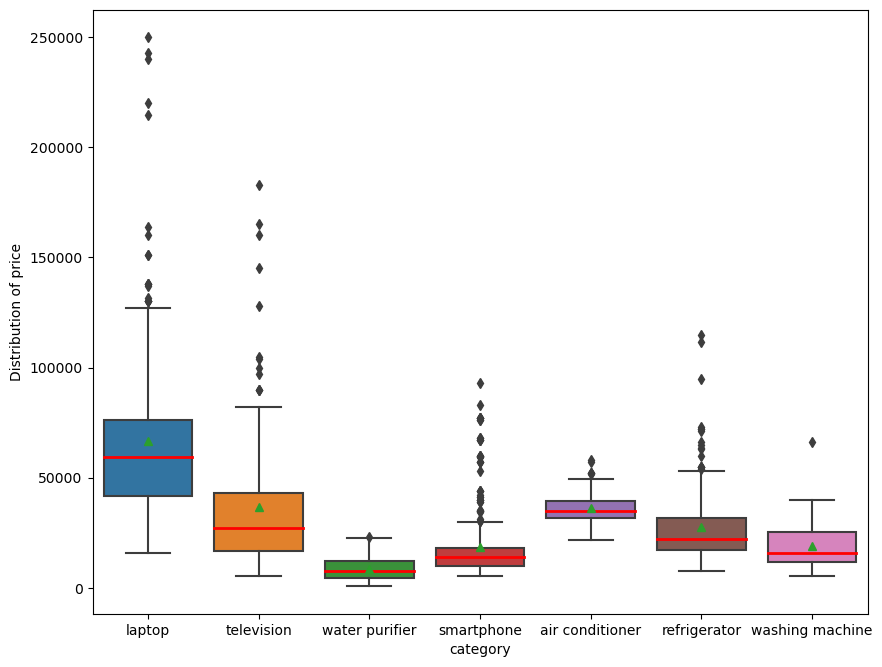

In [41]:
df_unique = df.drop_duplicates(subset=['product_name'])
plt.figure(figsize=(10,8),dpi=100)
sns.boxplot(x='category', y='price',data=df_unique,
            whis=1.5, showmeans=True, showfliers=True,
            showbox=True, medianprops={"linewidth": 2, "color": "red"},)

plt.ylabel('Distribution of price')
plt.plot()

#### NO treatment is needed to outlier because some high end laptops are very expensive

# 7. Adding a feature "short_name" because names of products are too lenghty

In [42]:
def short_name(full_name):
    name_list = full_name.split()
    short_name = ''
    for i in name_list[0:10]:
        short_name += i + ' '
    short_name=short_name.strip()+'...'
    return short_name

In [43]:
df['short_name'] = df['product_name'].map(short_name)

In [44]:
df.head()

,prod_id,product_name,brand_name,category,price,sold,prod_url,customer_name,purchase_date,customers_city,rating,comment_head,comment,purchase_month,purchase_year,short_name
0,lapto6288,acer Aspire 3 Core i5 11th Gen - (8 GB/512 GB ...,acer,laptop,44999.0,1,https://www.flipkart.com/acer-aspire-3-core-i5...,Flipkart Customer,2023-01-01,Karimpur,5,Great product,Very good product 🙂🎈🎈🎈🎈🎈,1,2023,acer Aspire 3 Core i5 11th Gen - (8 GB/512...
1,lapto6288,acer Aspire 3 Core i5 11th Gen - (8 GB/512 GB ...,acer,laptop,44999.0,1,https://www.flipkart.com/acer-aspire-3-core-i5...,Flipkart Customer,2023-01-01,Ranchi,4,Really Nice,nice,1,2023,acer Aspire 3 Core i5 11th Gen - (8 GB/512...
2,lapto6288,acer Aspire 3 Core i5 11th Gen - (8 GB/512 GB ...,acer,laptop,44999.0,1,https://www.flipkart.com/acer-aspire-3-core-i5...,Dhiraj Jaiswal,2023-01-01,Sidhi,3,Does the job,Good,1,2023,acer Aspire 3 Core i5 11th Gen - (8 GB/512...
3,lapto6288,acer Aspire 3 Core i5 11th Gen - (8 GB/512 GB ...,acer,laptop,44999.0,1,https://www.flipkart.com/acer-aspire-3-core-i5...,Vasamsetti Durgayya,2023-01-01,Hyderabad,5,Best in the market!,Good product at this price.i am very happy.per...,1,2023,acer Aspire 3 Core i5 11th Gen - (8 GB/512...
4,lapto6288,acer Aspire 3 Core i5 11th Gen - (8 GB/512 GB ...,acer,laptop,44999.0,1,https://www.flipkart.com/acer-aspire-3-core-i5...,Flipkart Customer,2023-01-01,Bengaluru,1,Did not meet expectations,Worst laptop don't buy this laptop,1,2023,acer Aspire 3 Core i5 11th Gen - (8 GB/512...


# 8. saving changes into new file.

In [45]:
df.to_csv(r"D:\flipkart reviews\all csv combine\processed_reviews.csv" , index=False)